# <span style='color:dodgerBlue; font-weight:bold;'>Store Sales</span>

### <span style='color:aqua; font-weight:bold;'>Context: </span>

Forecasts aren’t just for meteorologists. Governments forecast economic growth. Scientists attempt to predict the future population. And businesses forecast product demand—a common task of professional data scientists. Forecasts are especially relevant to brick-and-mortar grocery stores, which must dance delicately with how much inventory to buy. Predict a little over, and grocers are stuck with overstocked, perishable goods. Guess a little under, and popular items quickly sell out, leading to lost revenue and upset customers. More accurate forecasting, thanks to machine learning, could help ensure retailers please customers by having just enough of the right products at the right time.

Current subjective forecasting methods for retail have little data to back them up and are unlikely to be automated. The problem becomes even more complex as retailers add new locations with unique needs, new products, ever-transitioning seasonal tastes, and unpredictable product marketing..


### <span style='color:aqua; font-weight:bold;'> Import Packages </span>

In [2]:
# Essentials
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
#import plotly.graph_objects as go
#import plotly.express as px
%matplotlib inline

# Machine learning and statistical
#import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
#from xgboost import XGBRegressor

# Ignore useless warnings
import warnings
warnings.filterwarnings('ignore')

### <span style='color:aqua; font-weight:bold;'> Load the Data </span>

In [3]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

oil = pd.read_csv('Data/oil.csv')
stores = pd.read_csv('Data/stores.csv')
holidays = pd.read_csv('Data/holidays_events.csv')
transactions = pd.read_csv('Data/transactions.csv')

# <span style='color:dodgerblue; font-weight:bold;'> Exploratory Data Analysis</span> 

### <span style='color:aqua; font-weight:bold;'> Train </span>

In [4]:
train.shape

(3000888, 6)

In [5]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [6]:
train = train.drop('id', axis=1)

In [7]:
train.head(1)

,date,store_nbr,family,sales,onpromotion
0,2013-01-01,1,AUTOMOTIVE,0.0,0


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   date         object 
 1   store_nbr    int64  
 2   family       object 
 3   sales        float64
 4   onpromotion  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 114.5+ MB


We have to change data type of "date" feature from object to date

In [9]:
train['date'] = pd.to_datetime(train['date'])

In [10]:
train.describe().T

,count,mean,min,25%,50%,75%,max,std
date,3000888,2015-04-24 08:27:04.703088384,2013-01-01 00:00:00,2014-02-26 18:00:00,2015-04-24 12:00:00,2016-06-19 06:00:00,2017-08-15 00:00:00,NaN
store_nbr,3000888.0,27.5,1.0,14.0,27.5,41.0,54.0,15.585787
sales,3000888.0,357.775749,0.0,0.0,11.0,195.84725,124717.0,1101.997721
onpromotion,3000888.0,2.60277,0.0,0.0,0.0,0.0,741.0,12.218882


In [11]:
train.isnull().sum()

date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [12]:
train.duplicated().sum()

0

### <span style='color:aqua; font-weight:bold;'> Holiday Events</span>

In [13]:
holidays.shape

(350, 6)

In [14]:
holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [15]:
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [16]:
holidays['date'] = pd.to_datetime(holidays['date'])

In [17]:
holidays.describe().T

,count,mean,min,25%,50%,75%,max
date,350,2015-04-24 00:45:15.428571392,2012-03-02 00:00:00,2013-12-23 06:00:00,2015-06-08 00:00:00,2016-07-03 00:00:00,2017-12-26 00:00:00


In [18]:
holidays.isnull().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [19]:
holidays.duplicated().sum()

0

### <span style='color:aqua; font-weight:bold;'> Oil </span>

In [20]:
oil.shape

(1218, 2)

In [21]:
oil.head(5)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [22]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [23]:
oil['date'] = pd.to_datetime(oil['date'])

In [24]:
oil.describe().T

,count,mean,min,25%,50%,75%,max,std
date,1218,2015-05-02 12:00:00,2013-01-01 00:00:00,2014-03-03 06:00:00,2015-05-02 12:00:00,2016-06-30 18:00:00,2017-08-31 00:00:00,NaN
dcoilwtico,1175.0,67.714366,26.19,46.405,53.19,95.66,110.62,25.630476


#### Handling Missing Values

In [25]:
oil.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

We will .............

In [26]:
# Handling numarical missing values using SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(oil[['dcoilwtico']])
oil[['dcoilwtico']]=imputer.transform(oil[['dcoilwtico']])

In [27]:
oil.isnull().sum().sum() # Checking if there is any missing values

0

In [28]:
oil.duplicated().sum()

0

### <span style='color:aqua; font-weight:bold;'> Stores </span>

In [29]:
stores.shape

(54, 5)

In [30]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [31]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [32]:
stores.isnull().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [33]:
stores.duplicated().sum()

0

### <span style='color:aqua; font-weight:bold;'> Test </span>

In [34]:
test.shape

(28512, 5)

In [35]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [37]:
test['date'] = pd.to_datetime(test['date'])

In [38]:
test.isnull().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

In [39]:
test.duplicated().sum()

0

# <span style='color:dodgerblue; font-weight:bold;'>Plot relationship between variables </span> 

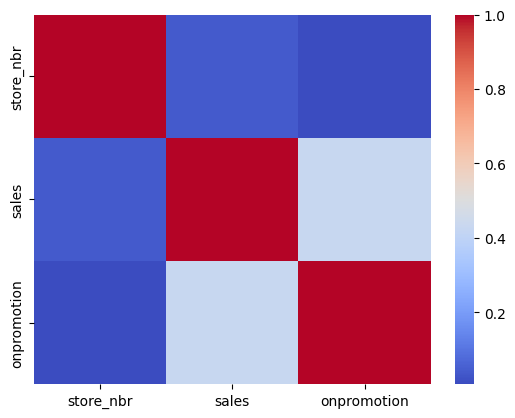

In [40]:
# Select non-numeric columns
non_numeric_columns = train.select_dtypes(exclude=[np.number]).columns

# Dropping non-numeric columns
numeric_data = train.drop(columns=non_numeric_columns)

# Correlation matrix using only numeric data
corr = numeric_data.corr()

# Plot heatmap
sns.heatmap(corr, cmap="coolwarm");

Top 10 Product Families by Sales

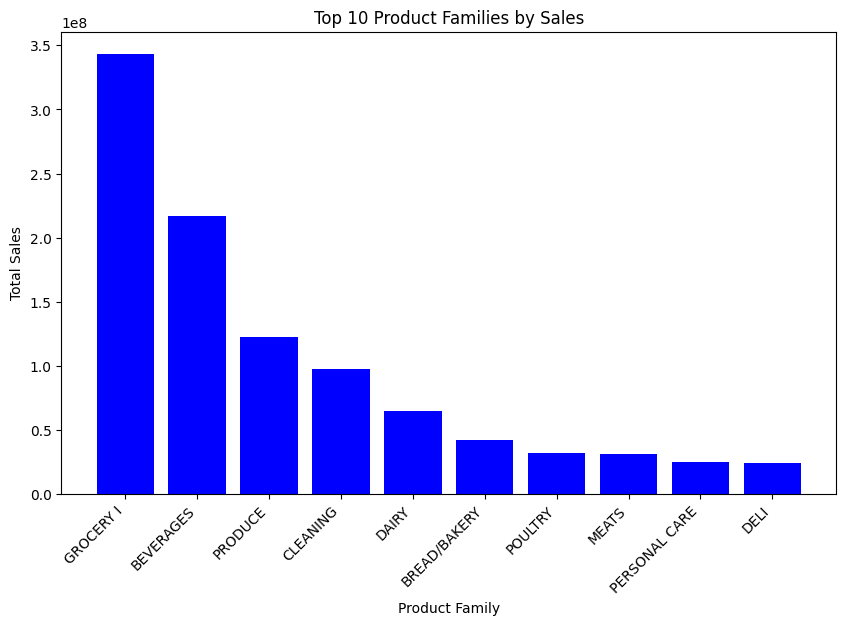

In [41]:
# Group by 'family' and sum the sales
sales_by_family = train.groupby('family')['sales'].sum().reset_index()

# Sort the data by sales in descending order
sales_by_family = sales_by_family.sort_values(by='sales', ascending=False)

# Plot the top 10 families by sales
plt.figure(figsize=(10, 6))
plt.bar(sales_by_family['family'][:10], sales_by_family['sales'][:10], color='blue')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Product Families by Sales')
plt.xlabel('Product Family')
plt.ylabel('Total Sales')
plt.show()

Top 10 Stores by Sales

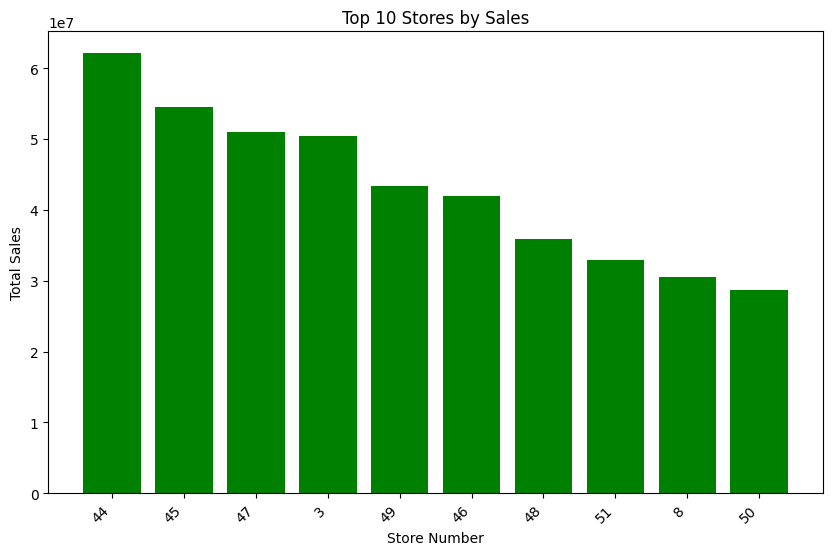

In [42]:
# Assuming your DataFrame is named 'df'
# Group by 'store_nbr' and sum the sales
sales_by_store = train.groupby('store_nbr')['sales'].sum().reset_index()

# Sort the data by sales in descending order
sales_by_store = sales_by_store.sort_values(by='sales', ascending=False)

# Plot the top 10 stores by sales
plt.figure(figsize=(10, 6))
plt.bar(sales_by_store['store_nbr'][:10].astype(str), sales_by_store['sales'][:10], color='green')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Stores by Sales')
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.show()

Top 10 Stores by Number of Items on Promotion

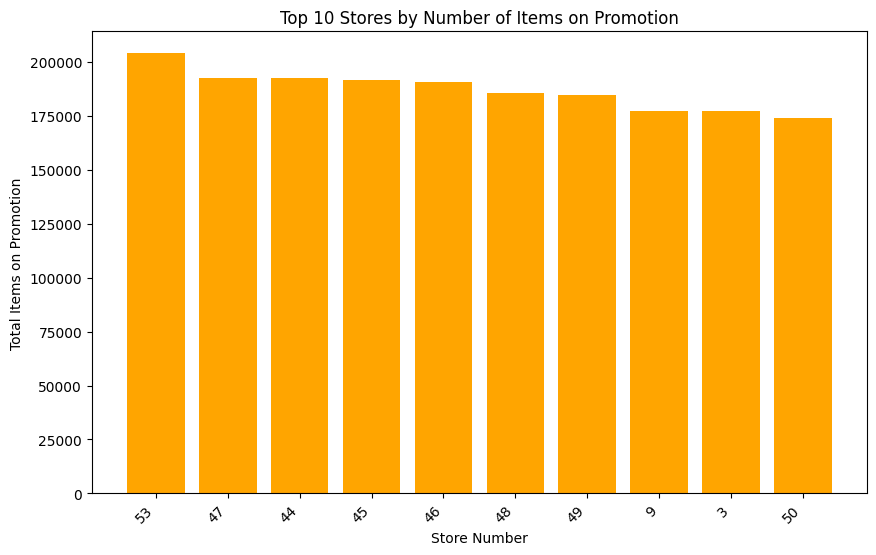

In [43]:
# Assuming your DataFrame is named 'df'
# Group by 'store_nbr' and sum the 'onpromotion' values for each store
promotion_by_store = train.groupby('store_nbr')['onpromotion'].sum().reset_index()

# Sort the data by the number of items on promotion in descending order
promotion_by_store = promotion_by_store.sort_values(by='onpromotion', ascending=False)

# Plot the top 10 stores by number of promotions
plt.figure(figsize=(10, 6))
plt.bar(promotion_by_store['store_nbr'][:10].astype(str), promotion_by_store['onpromotion'][:10], color='orange')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Stores by Number of Items on Promotion')
plt.xlabel('Store Number')
plt.ylabel('Total Items on Promotion')
plt.show()

Sales Trends Over Time (Top 10 Families)

In [44]:
"""# Get top 10 families by total sales
top_families = train.groupby('family')['sales'].sum().nlargest(10).index
sales_trends = train[train['family'].isin(top_families)].groupby(['date', 'family'])['sales'].sum().reset_index()

# Plot
fig = px.line(sales_trends, x='date', y='sales', color='family',
              title='Sales Trends Over Time (Top 10 Families)',
              labels={'sales': 'Total Sales', 'date': 'Date'})
fig.show()"""

NameError: name 'px' is not defined

Sales Distribution by (Top 10 Families)

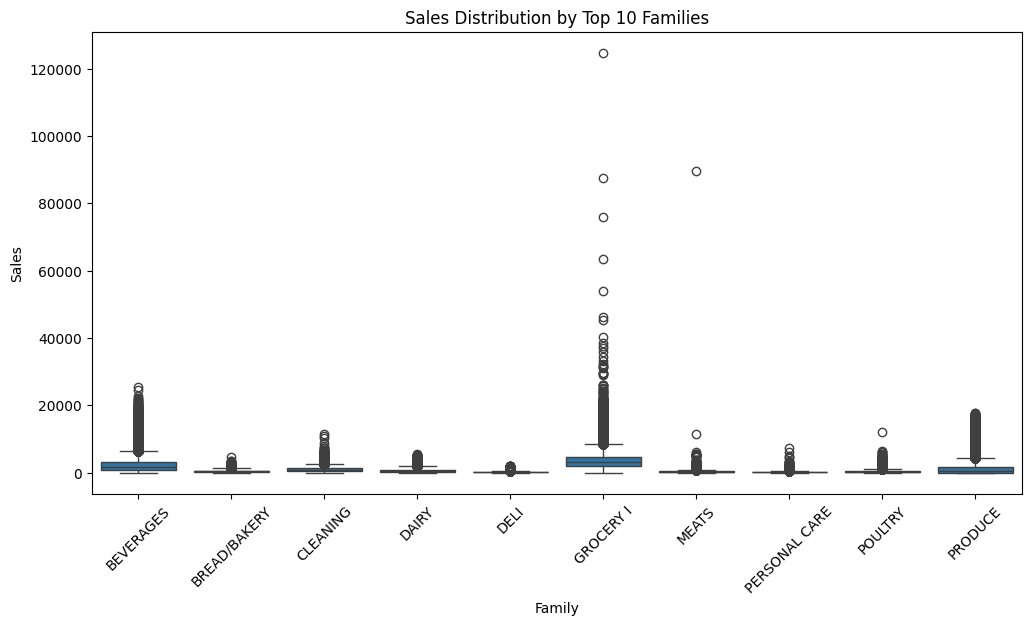

In [45]:
# Filter for top 10 families
top_families = train.groupby('family')['sales'].sum().nlargest(10).index
filtered_data = train[train['family'].isin(top_families)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='family', y='sales', data=filtered_data)
plt.title('Sales Distribution by Top 10 Families')
plt.xlabel('Family')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

Average Sales on Holidays vs Non-Holidays (Top 10 Families)

In [46]:
"""# Assuming merged_data contains holiday info and holidays dataframe is already loaded
merged_data['is_holiday'] = merged_data['date'].isin(holidays['date'])

# Filter for top 10 families
top_families = merged_data.groupby('family')['sales'].sum().nlargest(10).index

# Filter data for top 10 families and group by 'is_holiday' to calculate mean sales
holiday_effect = merged_data[merged_data['family'].isin(top_families)].groupby('is_holiday')['sales'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='is_holiday', y='sales', data=holiday_effect, palette="Blues")

# Set plot title and labels
plt.title('Average Sales on Holidays vs Non-Holidays (Top 10 Families)', fontsize=14)
plt.xlabel('Is Holiday', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)

# Adjust x-axis tick labels
plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'], fontsize=11)

# Show the plot
plt.show()"""

'# Assuming merged_data contains holiday info and holidays dataframe is already loaded\nmerged_data[\'is_holiday\'] = merged_data[\'date\'].isin(holidays[\'date\'])\n\n# Filter for top 10 families\ntop_families = merged_data.groupby(\'family\')[\'sales\'].sum().nlargest(10).index\n\n# Filter data for top 10 families and group by \'is_holiday\' to calculate mean sales\nholiday_effect = merged_data[merged_data[\'family\'].isin(top_families)].groupby(\'is_holiday\')[\'sales\'].mean().reset_index()\n\n# Create the bar plot\nplt.figure(figsize=(8, 5))\nsns.barplot(x=\'is_holiday\', y=\'sales\', data=holiday_effect, palette="Blues")\n\n# Set plot title and labels\nplt.title(\'Average Sales on Holidays vs Non-Holidays (Top 10 Families)\', fontsize=14)\nplt.xlabel(\'Is Holiday\', fontsize=12)\nplt.ylabel(\'Average Sales\', fontsize=12)\n\n# Adjust x-axis tick labels\nplt.xticks(ticks=[0, 1], labels=[\'Non-Holiday\', \'Holiday\'], fontsize=11)\n\n# Show the plot\nplt.show()'

Oil Prices Over Time

In [47]:
"""# Merge the train data with oil data
merged_data = pd.merge(train, oil, on='date', how='left')

# Filter out rows where oil prices are NaN
filtered_data = merged_data.dropna(subset=['dcoilwtico'])

# Plot only oil prices over time
fig = go.Figure()

# Add oil prices to the plot
fig.add_trace(go.Scatter(x=filtered_data['date'], y=filtered_data['dcoilwtico'], 
                         mode='lines', name='Oil Prices', line=dict(color='orange')))

# Update layout
fig.update_layout(title_text='Oil Prices Over Time',
                  xaxis_title='Date', 
                  yaxis_title='Oil Prices',
                  yaxis=dict(tickprefix="$"))
fig.show()"""

'# Merge the train data with oil data\nmerged_data = pd.merge(train, oil, on=\'date\', how=\'left\')\n\n# Filter out rows where oil prices are NaN\nfiltered_data = merged_data.dropna(subset=[\'dcoilwtico\'])\n\n# Plot only oil prices over time\nfig = go.Figure()\n\n# Add oil prices to the plot\nfig.add_trace(go.Scatter(x=filtered_data[\'date\'], y=filtered_data[\'dcoilwtico\'], \n                         mode=\'lines\', name=\'Oil Prices\', line=dict(color=\'orange\')))\n\n# Update layout\nfig.update_layout(title_text=\'Oil Prices Over Time\',\n                  xaxis_title=\'Date\', \n                  yaxis_title=\'Oil Prices\',\n                  yaxis=dict(tickprefix="$"))\nfig.show()'

# <span style='color:dodgerblue; font-weight:bold;'>Data Preprocessing </span> 

In [48]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler

In [49]:
# Merge additional information into the train and test data
train = train.merge(stores, on='store_nbr', how='left')
test = test.merge(stores, on='store_nbr', how='left')

train = train.merge(oil, on='date', how='left')
test = test.merge(oil, on='date', how='left')

train = train.merge(holidays, on='date', how='left')
test = test.merge(holidays, on='date', how='left')

In [50]:
print(train['date'].dtype)
print(transactions['date'].dtype)


datetime64[ns]
object


In [51]:
# Convert 'date' column in both DataFrames to datetime
train['date'] = pd.to_datetime(train['date'])
transactions['date'] = pd.to_datetime(transactions['date'])

In [52]:
# Merge transactions data into train and test
train = train.merge(transactions, on=['date', 'store_nbr'], how='left')
test = test.merge(transactions, on=['date', 'store_nbr'], how='left')

In [53]:
train['transactions'] = train['transactions'].fillna(0)
test['transactions'] = test['transactions'].fillna(0)

In [54]:
train

,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred,transactions
0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,67.714366,Holiday,National,Ecuador,Primer dia del ano,False,0.0
1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,67.714366,Holiday,National,Ecuador,Primer dia del ano,False,0.0
2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,67.714366,Holiday,National,Ecuador,Primer dia del ano,False,0.0
3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,67.714366,Holiday,National,Ecuador,Primer dia del ano,False,0.0
4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,67.714366,Holiday,National,Ecuador,Primer dia del ano,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,47.570000,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0
3054344,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,47.570000,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0
3054345,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,47.570000,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0
3054346,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,47.570000,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0


In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 16 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   store_nbr     int64         
 2   family        object        
 3   sales         float64       
 4   onpromotion   int64         
 5   city          object        
 6   state         object        
 7   type_x        object        
 8   cluster       int64         
 9   dcoilwtico    float64       
 10  type_y        object        
 11  locale        object        
 12  locale_name   object        
 13  description   object        
 14  transferred   object        
 15  transactions  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(9)
memory usage: 372.8+ MB


In [56]:
train.isna().sum()

date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
city                  0
state                 0
type_x                0
cluster               0
dcoilwtico       878526
type_y          2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
transactions          0
dtype: int64

In [57]:
train = train.dropna(subset=["type_x", "locale", "locale_name", "description", "transferred", "dcoilwtico"])

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 352836 entries, 0 to 3054347
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          352836 non-null  datetime64[ns]
 1   store_nbr     352836 non-null  int64         
 2   family        352836 non-null  object        
 3   sales         352836 non-null  float64       
 4   onpromotion   352836 non-null  int64         
 5   city          352836 non-null  object        
 6   state         352836 non-null  object        
 7   type_x        352836 non-null  object        
 8   cluster       352836 non-null  int64         
 9   dcoilwtico    352836 non-null  float64       
 10  type_y        352836 non-null  object        
 11  locale        352836 non-null  object        
 12  locale_name   352836 non-null  object        
 13  description   352836 non-null  object        
 14  transferred   352836 non-null  object        
 15  transactions  352836 

In [59]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming merged_df is already defined and contains your data
object_cols = train.select_dtypes(include=['object']).columns

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Encode each object column
for col in object_cols:
    train[col] = label_encoder.fit_transform(train[col])

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 352836 entries, 0 to 3054347
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          352836 non-null  datetime64[ns]
 1   store_nbr     352836 non-null  int64         
 2   family        352836 non-null  int32         
 3   sales         352836 non-null  float64       
 4   onpromotion   352836 non-null  int64         
 5   city          352836 non-null  int32         
 6   state         352836 non-null  int32         
 7   type_x        352836 non-null  int32         
 8   cluster       352836 non-null  int64         
 9   dcoilwtico    352836 non-null  float64       
 10  type_y        352836 non-null  int32         
 11  locale        352836 non-null  int32         
 12  locale_name   352836 non-null  int32         
 13  description   352836 non-null  int32         
 14  transferred   352836 non-null  int32         
 15  transactions  352836 

In [61]:
train.head()

,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred,transactions
0,2013-01-01,1,0,0.0,0,18,12,3,13,67.714366,3,1,4,45,0,0.0
1,2013-01-01,1,1,0.0,0,18,12,3,13,67.714366,3,1,4,45,0,0.0
2,2013-01-01,1,2,0.0,0,18,12,3,13,67.714366,3,1,4,45,0,0.0
3,2013-01-01,1,3,0.0,0,18,12,3,13,67.714366,3,1,4,45,0,0.0
4,2013-01-01,1,4,0.0,0,18,12,3,13,67.714366,3,1,4,45,0,0.0


In [62]:
# 4. Feature Engineering
# Extract date features
train['day_of_week'] = train['date'].dt.dayofweek
train['month'] = train['date'].dt.month


In [63]:
train.head()

,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred,transactions,day_of_week,month
0,2013-01-01,1,0,0.0,0,18,12,3,13,67.714366,3,1,4,45,0,0.0,1,1
1,2013-01-01,1,1,0.0,0,18,12,3,13,67.714366,3,1,4,45,0,0.0,1,1
2,2013-01-01,1,2,0.0,0,18,12,3,13,67.714366,3,1,4,45,0,0.0,1,1
3,2013-01-01,1,3,0.0,0,18,12,3,13,67.714366,3,1,4,45,0,0.0,1,1
4,2013-01-01,1,4,0.0,0,18,12,3,13,67.714366,3,1,4,45,0,0.0,1,1


In [64]:
# 5. Data Normalization
scaler = StandardScaler()

In [65]:
numerical_features = ['store_nbr', 'family', 'onpromotion', 'dcoilwtico', 'transactions', 'type_x', 'cluster']
train[numerical_features] = scaler.fit_transform(train[numerical_features])

In [66]:
# 6. Sequence Creation for LSTM
sequence_length = 30  # Number of past days to consider
features = train.drop(columns=['sales', 'date'])  # Drop target and non-feature columns

In [67]:
sequences = []
targets = []

for store_nbr in train['store_nbr'].unique():
    for family in train['family'].unique():
        store_family_df = train[(train['store_nbr'] == store_nbr) & (train['family'] == family)]
        for i in range(sequence_length, len(store_family_df)):
            seq = store_family_df.iloc[i-sequence_length:i].drop(columns=['store_nbr', 'family']).values
            target = store_family_df.iloc[i]['sales']
            sequences.append(seq)
            targets.append(target)

In [68]:
# Convert to NumPy arrays
sequences = np.array(sequences)
targets = np.array(targets)

In [69]:
# 7. Train-Test Split
split_index = int(len(sequences) * 0.8)
X_train, X_test = sequences[:split_index], sequences[split_index:]
y_train, y_test = targets[:split_index], targets[split_index:]

print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (239500, 30, 16)
Shape of y_train: (239500,)
Shape of X_test: (59876, 30, 16)
Shape of y_test: (59876,)


In [70]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
# 8. Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer for regression

model.compile(optimizer='adam', loss='mean_squared_error')


ImportError: cannot import name 'FeatureColumn' from 'tensorflow.python.feature_column.feature_column_v2' (c:\new_anaconda\envs\tf1\lib\site-packages\tensorflow\python\feature_column\feature_column_v2.py)